In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# distanve
import gower

# 
import importlib
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)
import lof_detection
importlib.reload(lof_detection)
# preprocessing tools
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# methods to remove
from sklearn.ensemble import IsolationForest

sns.set_palette('Set2')

In [2]:
# Load data
df = preprocessing.load_dataset()

# visualize dataset

In [3]:
# no missing values
df.isnull().sum()

Dim_0       0
Dim_1=0     0
Dim_2=0     0
Dim_3=0     0
Dim_4=0     0
Dim_5=0     0
Dim_6=0     0
Dim_7=0     0
Dim_8=0     0
Dim_9=0     0
Dim_10=0    0
Dim_11=0    0
Dim_12=0    0
Dim_13=0    0
Dim_14=0    0
Dim_15=0    0
Dim_16      0
Dim_17      0
Dim_18      0
Dim_19      0
Dim_20      0
dtype: int64

In [4]:
## higly imbalanced binary variable columns
for column in df:
    if column[-2:] == '=0':
        #print(column)
        print(df[column].value_counts(), '\n')

Dim_1=0
1    5009
0    2191
Name: count, dtype: int64 

Dim_2=0
1    6260
0     940
Name: count, dtype: int64 

Dim_3=0
1    7089
0     111
Name: count, dtype: int64 

Dim_4=0
1    7108
0      92
Name: count, dtype: int64 

Dim_5=0
1    6924
0     276
Name: count, dtype: int64 

Dim_6=0
1    7122
0      78
Name: count, dtype: int64 

Dim_7=0
1    7099
0     101
Name: count, dtype: int64 

Dim_8=0
1    7079
0     121
Name: count, dtype: int64 

Dim_9=0
1    6728
0     472
Name: count, dtype: int64 

Dim_10=0
1    6705
0     495
Name: count, dtype: int64 

Dim_11=0
1    7109
0      91
Name: count, dtype: int64 

Dim_12=0
1    7141
0      59
Name: count, dtype: int64 

Dim_13=0
1    7016
0     184
Name: count, dtype: int64 

Dim_14=0
1    7199
0       1
Name: count, dtype: int64 

Dim_15=0
1    6848
0     352
Name: count, dtype: int64 


In [5]:
# Data is MinMax scaled
[(df[c].min(), df[c].max()) for c in df.columns]

[(0.0, 1.0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0)]

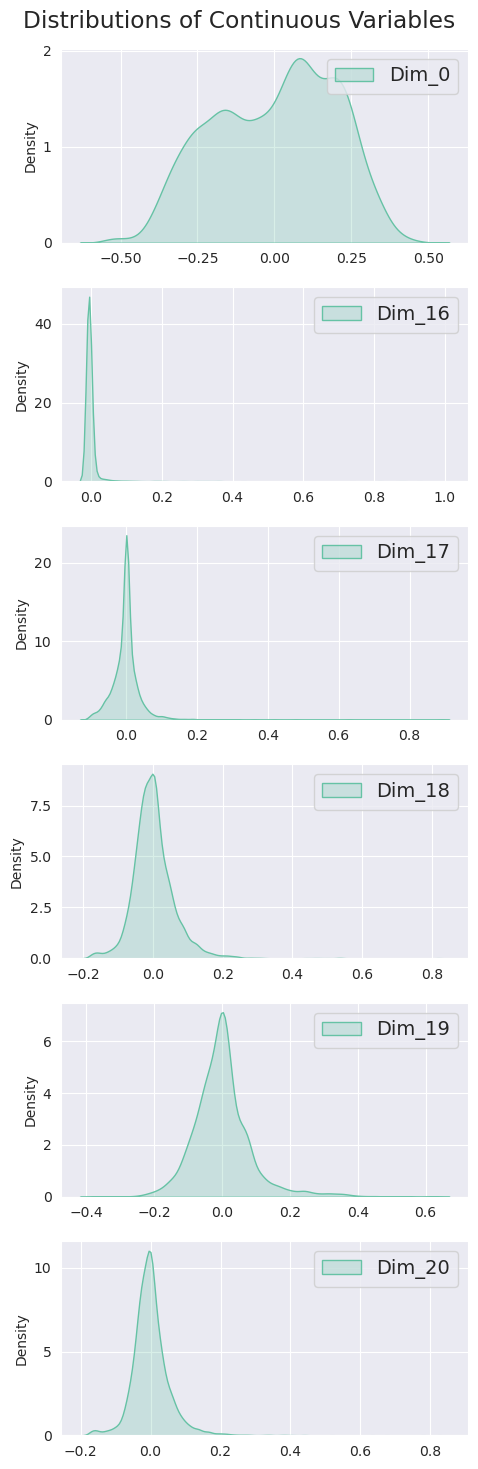

In [6]:
# plotting distributions of continuous variables
filtered_columns = [col for col in df.columns if col[-2:] != '=0']

df[filtered_columns] -= df[filtered_columns].mean()
 
# Set up a grid of subplots
fig, axes = plt.subplots(6, 1, figsize=(5, 15))
plt.rcParams.update({'font.size': 14})

axes = axes.flatten() # used to simplify the iteration over the subplots
for i, column in enumerate(filtered_columns):
    sns.kdeplot(df[column], fill=True, common_norm=False, label=f'{column}', ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].legend()

fig.suptitle('Distributions of Continuous Variables')
plt.tight_layout()
# Show the plot
plt.show()

In [34]:
utils.plot_3d_TSNE( df = preprocessing.load_dataset(),
                    dist_matrix=gower.gower_matrix(preprocessing.load_dataset()),
                    labels = np.array(lof_detection.main()) * -1,
                    )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.026s...
[t-SNE] Computed neighbors for 7200 samples in 0.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.808624
[t-SNE] KL divergence after 1000 iterations: 0.833370


In [35]:
lof_detection.main()

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
df = pd.DataFrame(preprocessing.load_dataset())

In [37]:
(df.iloc[:,14]).value_counts()

Dim_14=0
1    7199
0       1
Name: count, dtype: int64

In [38]:
np.argmin(df.iloc[:,14])

1077

In [39]:
lof_detection.main()[1077]

0

In [3]:
pd.read_csv('hypothyroid.csv').describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [5]:
df.describe()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.531790,0.695694,0.869444,0.984583,0.987222,0.961667,0.989167,0.985972,0.983194,0.934444,...,0.987361,0.991806,0.974444,0.999861,0.951111,0.009172,0.108506,0.179649,0.374250,0.173773
std,0.197156,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.111718,0.090158,0.157816,0.011785,0.215651,0.043357,0.042001,0.060148,0.088354,0.056402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001340,0.091922,0.145485,0.324074,0.145312
50%,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003208,0.109192,0.175585,0.370370,0.170313
75%,0.687500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.005094,0.119777,0.205686,0.402778,0.195313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
